In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import json
import glob
import numpy as np
from PIL import Image
import rasterio
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
from rasterio.plot import show_hist
#from scipy.misc import imsave
from imageio import imwrite
from sklearn.cluster import DBSCAN
from shapely.geometry import box
Image.MAX_IMAGE_PIXELS = None
import tifffile as tiff

In [2]:
from src.preprocessing.visualisation import plot_rgb_hist, plot_rgb_boxes
from src.preprocessing.normalization import rgb_array, max_norm, perc_norm

In [3]:
liebre1_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebrepansharp.tif"
liebre1_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre1_boxes.geojson"

## Liebre image 1

Normalize image array using to 0-255 using the 95th percentile as the maximum scaling value.

In [4]:
rgb_perc_norm = perc_norm(liebre1_image_path)

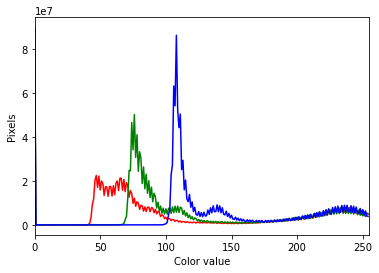

In [5]:
plot_rgb_hist(rgb_perc_norm, 255)

In [5]:
uint8_perc_norm = np.uint8(rgb_perc_norm)

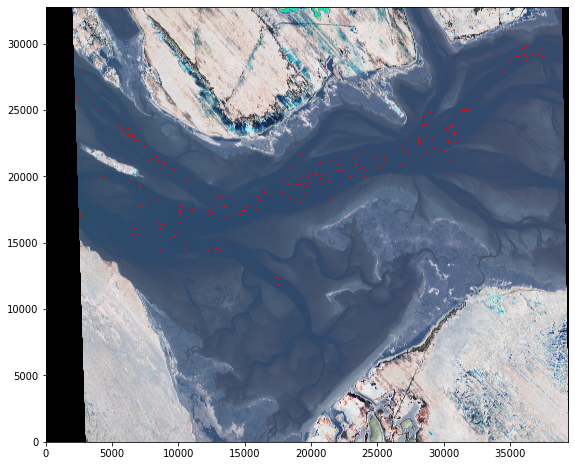

In [7]:
plot_rgb_boxes(liebre1_image_path, liebre1_box_path, uint8_perc_norm)

In [6]:
from src.preprocessing.dataprocessing import convert_coords, save_files, read_coords, get_bbox_info

In [7]:
image = Image.fromarray(uint8_perc_norm)
geo_image = rasterio.open(liebre1_image_path)

In [8]:
info = get_bbox_info(liebre1_box_path, image, geo_image)

In [19]:
file_save_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images"

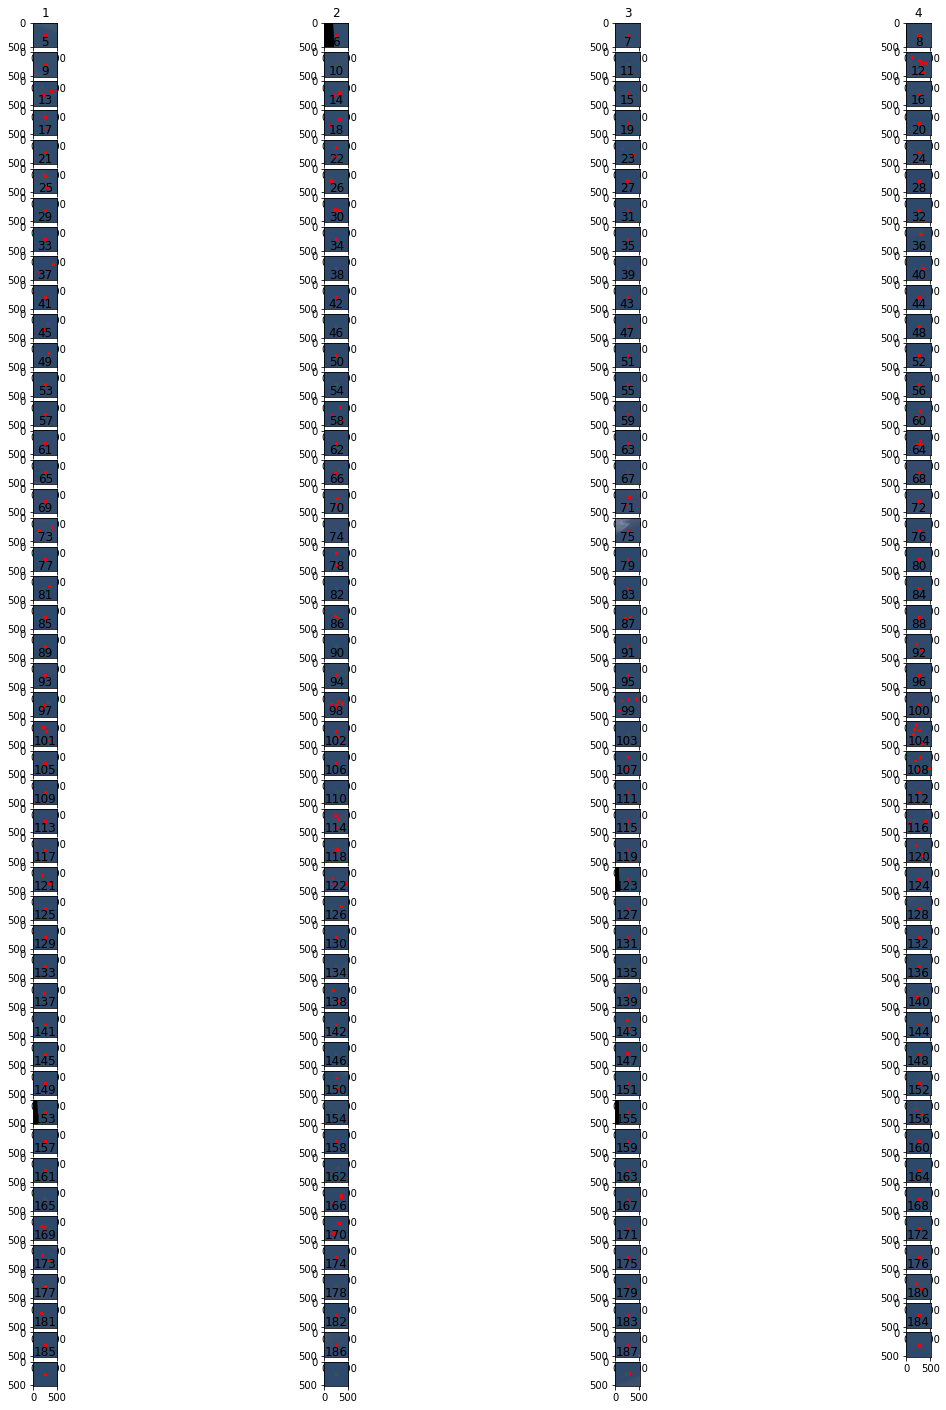

In [20]:
#save_files(image, info, file_save_path, 'liebre1')

In [21]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre1_7.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre1_7.txt"

In [22]:
cropped_image = Image.open(cropped_image_path)

91.0
250.99999999999957
292.99999999999955
383.0
336.0
263.0
378.0


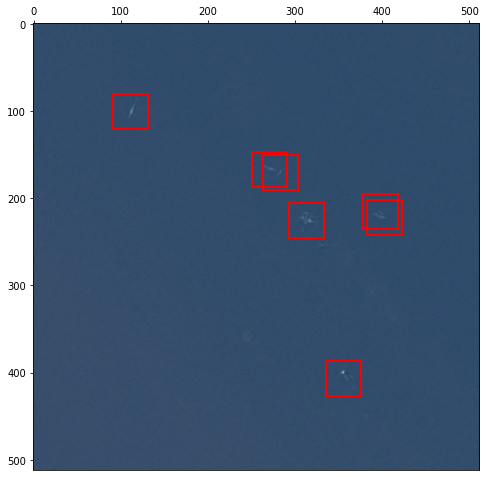

In [25]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()



## Liebre 2 Image 

## San Ignacio Image

In [3]:
sanig_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanigpansharp2.tif"
sanig_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanignacio_bounding_boxes.geojson"

In [ ]:
rgb_perc_norm_si = perc_norm(sanig_image_path)

In [ ]:
uint8_perc_norm_si = np.uint8(rgb_perc_norm_si)

In [ ]:
plot_rgb_boxes(liebre1_image_path, liebre1_box_path, uint8_perc_norm)